# Do You Visualize DataLoaders for Deep Neural Networks?

A lot of factors can affect the performance of a Deep Neural Network. Let’s see how we can setup a Pytorch pipeline for Image augmentation (with help of Albumentations Python library), and use visualization to find any potential issue before it costs you time and money.

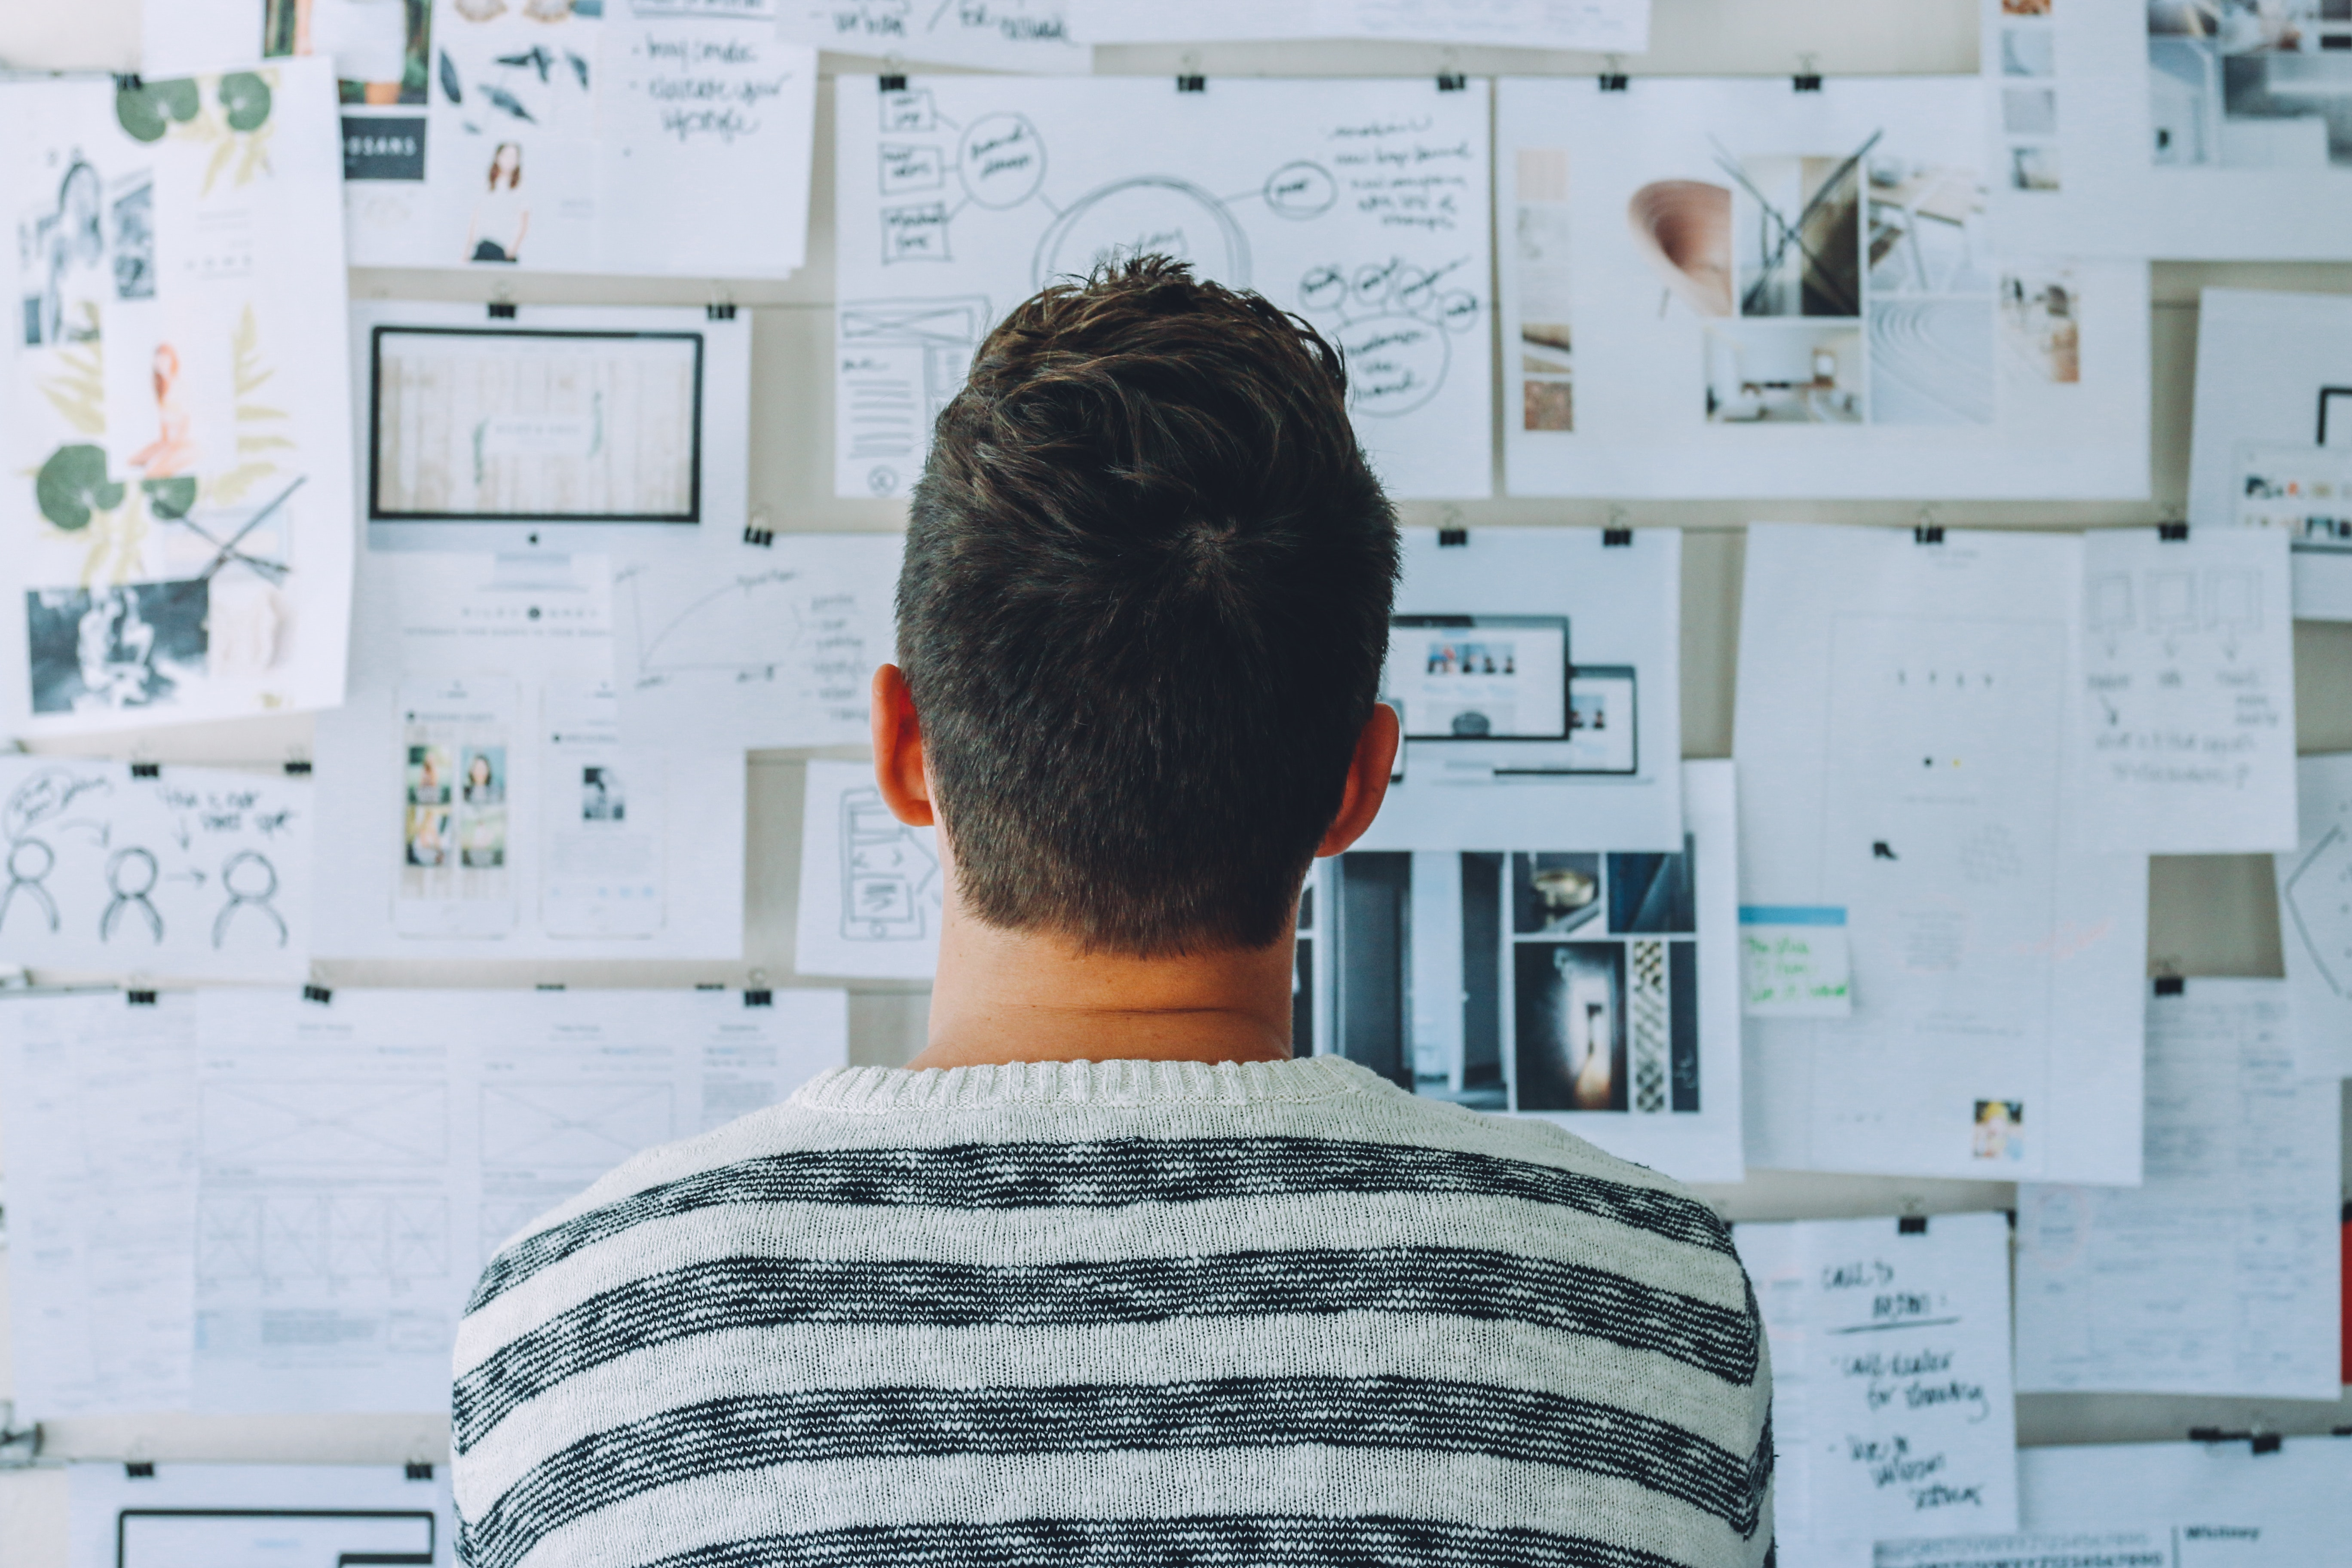

Photo by [Startup Stock Photos](https://www.pexels.com/photo/man-wearing-black-and-white-stripe-shirt-looking-at-white-printer-papers-on-the-wall-212286/) from Pexels

In software development when something is wrong, usually we get an error, but with data science this is not the case. If the model is not performing well, then the general approach is to alter the model architecture or tune hyper parameters and train more. Yes, these are good options but making sure that the data is correct should be the priority.

From the television series *[The Newsroom<sub>1</sub>](https://www.imdb.com/title/tt1870479/)*:
> The first step in solving a problem is to recognize that it does exist. 

Difference in train vs test data is the single biggest reason for low performing models. Image augmentations help to fight overfitting and improve the performance of deep neural networks for computer vision tasks. In this post, we will cover the following:

1. Overview of Computer Vision Tasks
2. Computer Vision Pipeline
3. Image Augmentation using Albumentations
4. Visualize DataLoaders

If you are familiar with Computer Vision tasks and Pytorch, then feel free to skip the first two.

# Overview of Computer Vision Tasks

Common types of Computer Vision (CV) tasks are:

* Image Classification
* Image Segmentation
* Object Detection 

If you are not familiar with the difference between them, then check out the post - [Image Classification vs. Object Detection vs. Image Segmentation](https://medium.com/analytics-vidhya/image-classification-vs-object-detection-vs-image-segmentation-f36db85fe81) by. Image augmentations help to make the model generalize better for all 3 types CV tasks.

# Computer Vision Pipeline

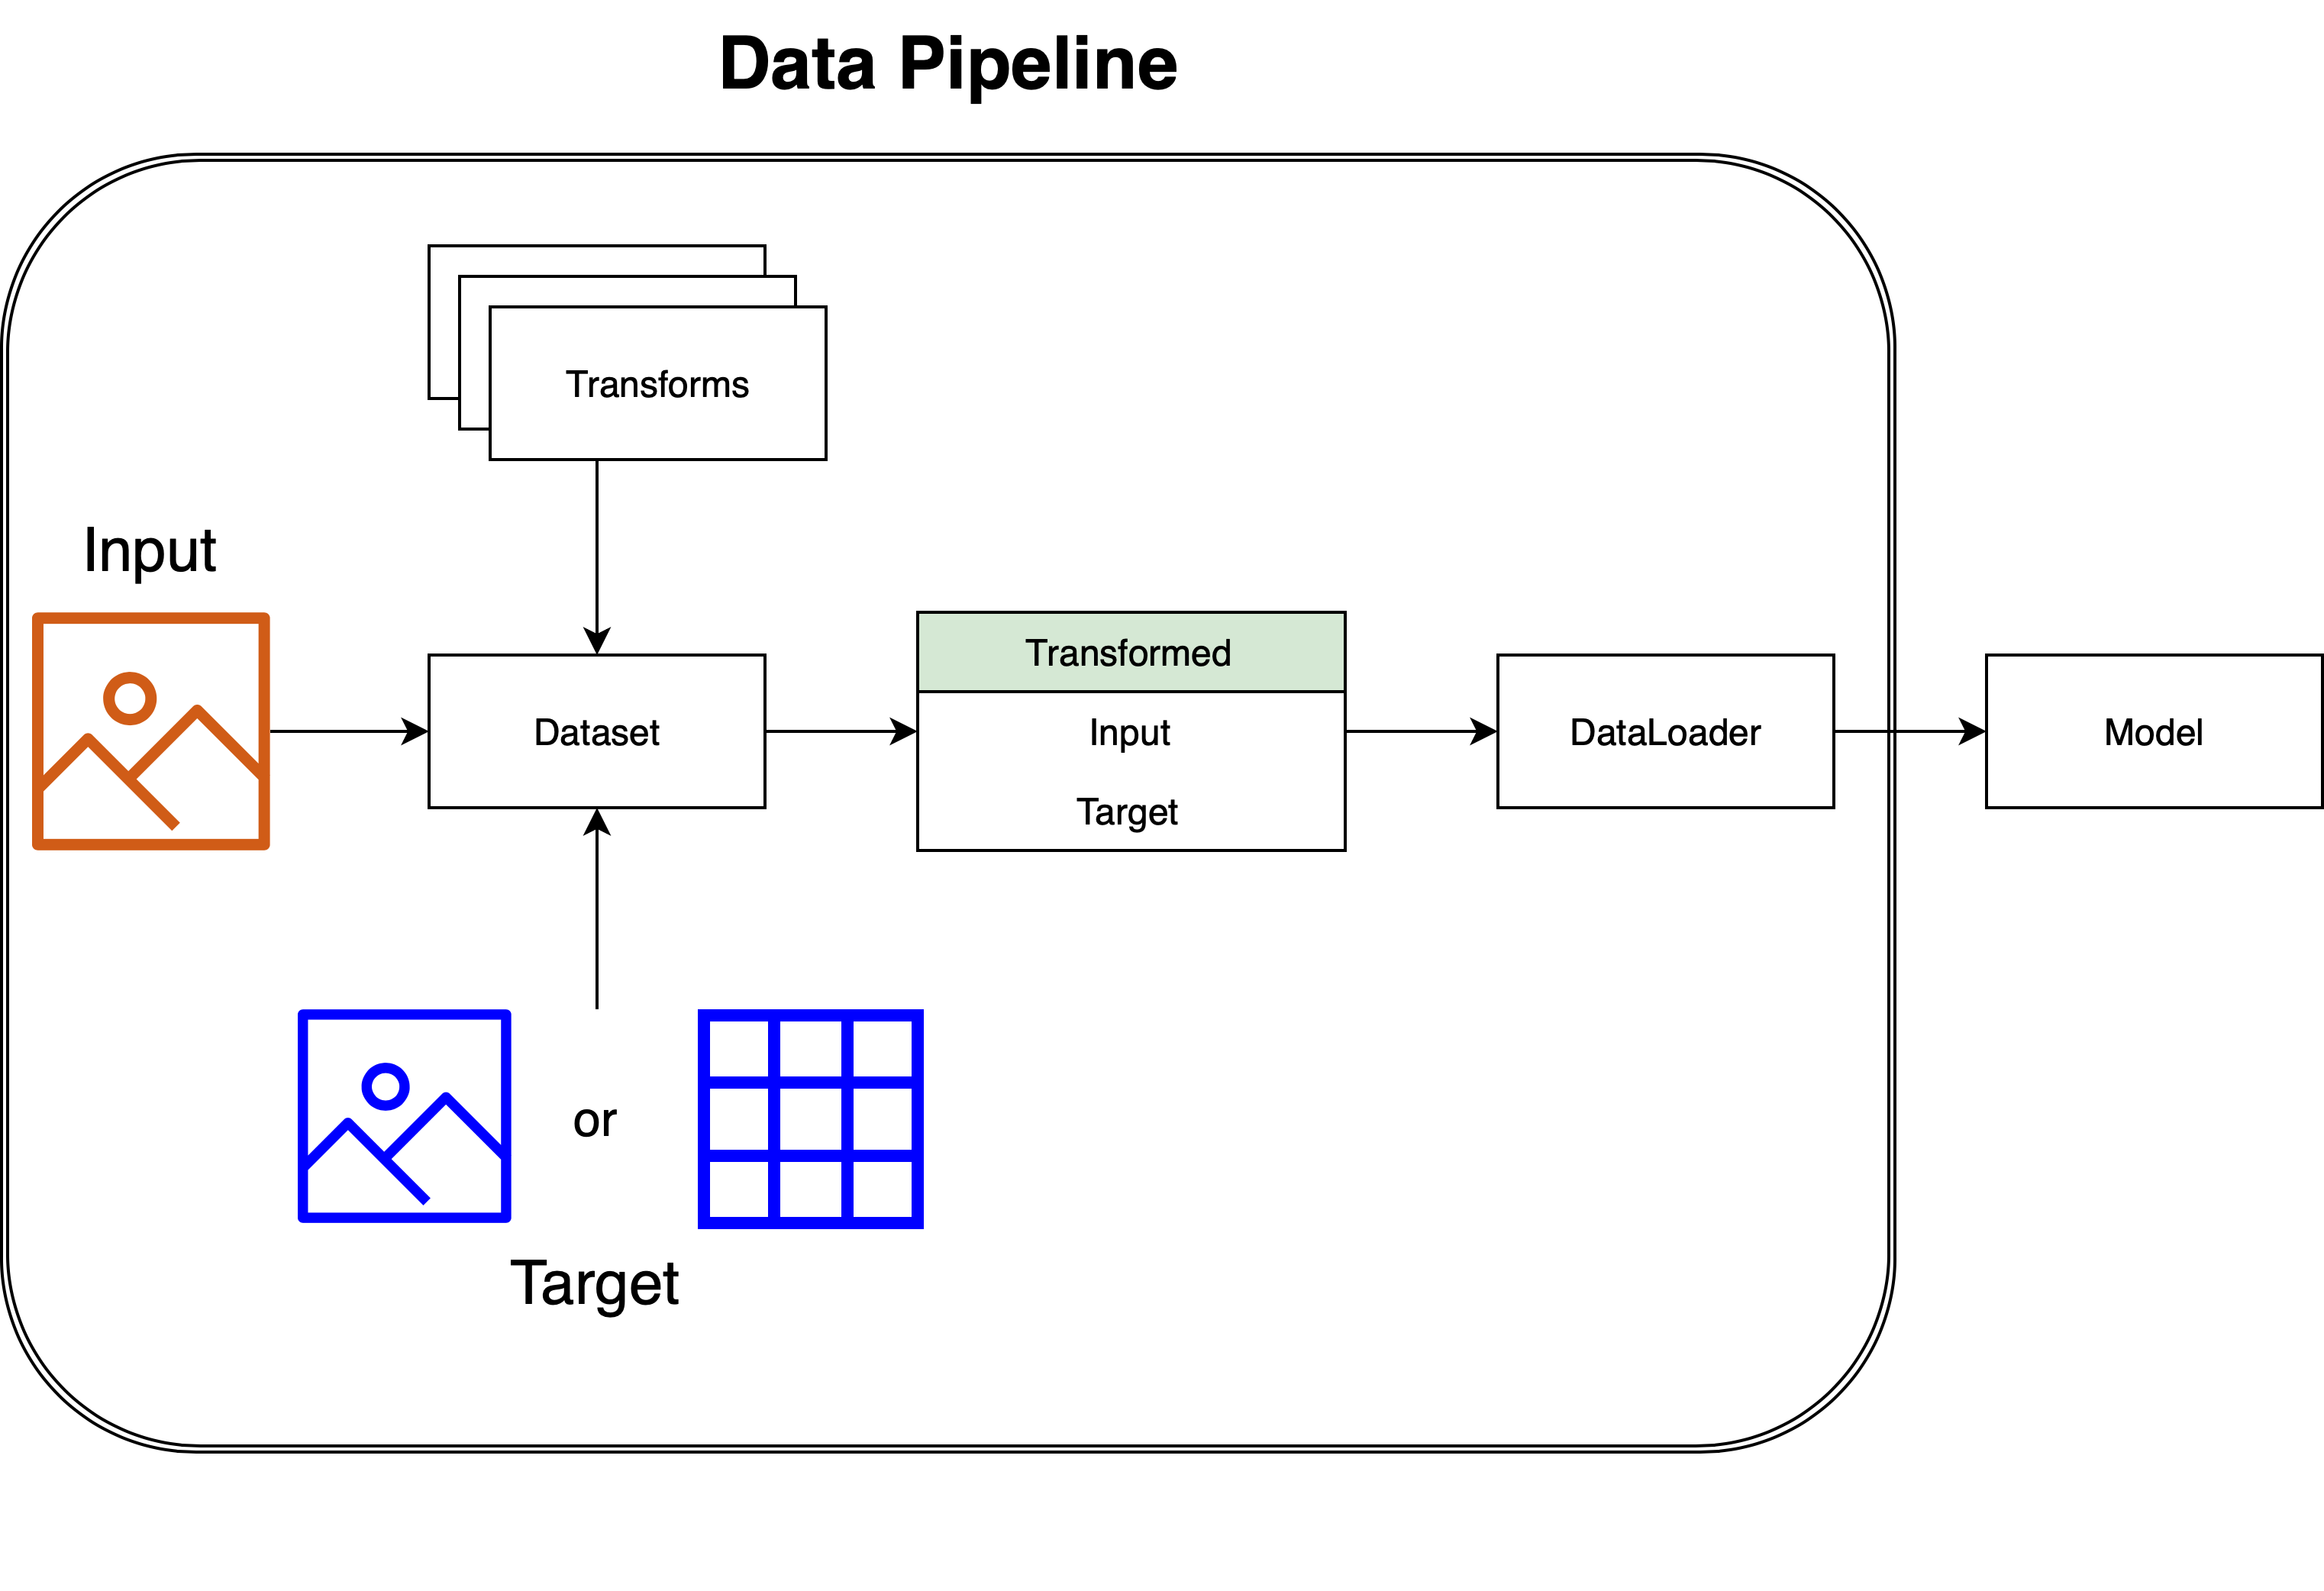

Both Input and Target data has to go through Dataset and DataLoader before being passed on to the model for training.
It is better to visualize the output of the DataLoader. By this way, we can also identify when there is an issue with the Dataset definition. In relation to the above data pipeline diagram, only Target data type and Transformations applied differs based on CV task type.

# Image Augmentation using Albumentations

[Albumentations](https://albumentations.ai/docs/) is a fast and flexible image augmentation library. It supports both Pytorch and Keras. [Torchvision](https://pytorch.org/vision/stable/index.html) library is good but when it comes to Image Segmentation or Object Detection, it requires lot of effort to get it right. To elaborate, Pixel-level and Spatial-level are two types of image augmentations. The way of applying transformations to input data and target label differs for these two types.

## Pixel-level augmentations: 

Changes the values of pixels of the original image, but they don't change the output mask. Image transformations such as changing brightness or contrast of adjusting values of the RGB-palette of the image are pixel-level augmentations. We modify the input image by adjusting its brightness, but we keep the output mask intact.

![pixel-level augmentation](https://albumentations.ai/docs/images/introduction/dedicated_library/pixel_level_augmentation_for_inria_dataset.jpg)



## Spatial-level augmentations: 

Changes both the image and the mask. When you apply image transformations such as mirroring or rotation or cropping a part of the input image, you also need to apply the same transformation to the output label to preserve its correctness.

![spatial_level_augmentation](https://albumentations.ai/docs/images/introduction/dedicated_library/spatial_level_augmentation_for_inria_dataset.jpg)

## Brownie Points

* Ability to add image augmentations to any computer vision pipeline with minimal effort.
* Syntax for transforms declaration is very similar to Torchvision.  
* Lets you set the required probabilities and the magnitude of values for each transformation.

Example definition of an augmentation pipeline is as follows:

In [ ]:
import albumentations as A

transform = A.Compose([
    A.RandomCrop(512, 512),
    A.RandomBrightnessContrast(p=0.3),
    A.HorizontalFlip(p=0.5),
])

Still not convinced? Then check out the article - [Why you need a dedicated library for image augmentation](https://albumentations.ai/docs/introduction/why_you_need_a_dedicated_library_for_image_augmentation/).

# Visualize DataLoaders

## Why?

Right now, probably would be wondering if Albumentations is so great then why do we need to visualize the DataLoaders. I'm glad you asked, Albumentation still requires user input and we are not that great at providing correct values<sub>2</sub>. Any rational person should think about the type of augmentation and whether it is applicable to a particular dataset or not but often this is not the case. 

> It is better to visualize just to avoid any surprises. 

When Rotation transformation is applied on the digit 9 from MNIST dataset, it can be transformed to 6 but the label would still say 9. See how easy it is to screw up data augmentation.?

| Original Image - 9| Transformed Image - 9|
|:-:|:-:|
|![Original Image - 9](https://dev-to-uploads.s3.amazonaws.com/uploads/articles/kybk6nv442jxwe7527dn.jpeg)|![Transformed Image - 9](https://dev-to-uploads.s3.amazonaws.com/uploads/articles/lzfi2mgtso53udzzpb0g.jpeg)|


## How?


Torchvision functions like [make_grid](https://pytorch.org/vision/stable/utils.html#torchvision.utils.make_grid) and [draw_bounding_boxes](https://pytorch.org/vision/stable/utils.html#torchvision.utils.draw_bounding_boxes) are quite handy, but they are not end to end. So we will write sort of wrappers which take in the `iter` object of the DataLoaders and plot the Input and Target data values.

Notes about the below code:

* Pytorch Tensor expects image of shape (C x H x W) which is the reverse when compared to Numpy array shape (H x W x C).

* Image data must be torch tensor of `float` data type to train the model, whereas for plotting it should be of type `uint8`.

* It is best practice to avoid multiple initialization of the `iter` object for DataLoaders when possible as it is very time consuming. This is the reason for taking the `iter` object as function parameter instead of DataLoader itself.

Once again, The focus is on the output of DataLoaders, if you are interested in the overall data pipeline then check out this [Colab Notebook](https://colab.research.google.com/drive/1xnYAmyWqMKMaYDY4J6yty_hQEIPrLMcK?usp=sharing)

**Image Classification**

Dataset &#128073; [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html)

Transforms &#128073; Resize &#10145;&#65039; Rotate &#10145;&#65039; Horizontal Flip 

In [ ]:
def visualize_classification(loader_iter, labelMap = CIFAR10Dataset.id2lbl, nrofItems = 5, pad = 4):

  #Iterate through the data loader
  imgTensor, labels = next(loader_iter)
  
  # Generate image grid
  grid = make_grid(imgTensor[:nrofItems], padding = pad, nrow=nrofItems)

  # Permute the axis as numpy expects image of shape (H x W x C) 
  grid = grid.permute(1, 2, 0)

  # Get Labels
  labels = [labelMap[lbl.item()] for lbl in labels[:nrofItems]]
  
  # Set up plot config
  plt.figure(figsize=(8, 2), dpi=300)
  plt.axis('off')

  # Plot Image Grid
  plt.imshow(grid)
  
  # Plot the image titles
  fact = 1 + (nrofItems)/100
  rng = np.linspace(1/(fact*nrofItems), 1 - 1/(fact*nrofItems) , num = nrofItems)
  for idx, val in enumerate(rng):
    plt.figtext(val, 0.85, labels[idx], fontsize=8)

  # Show the plot
  plt.show()

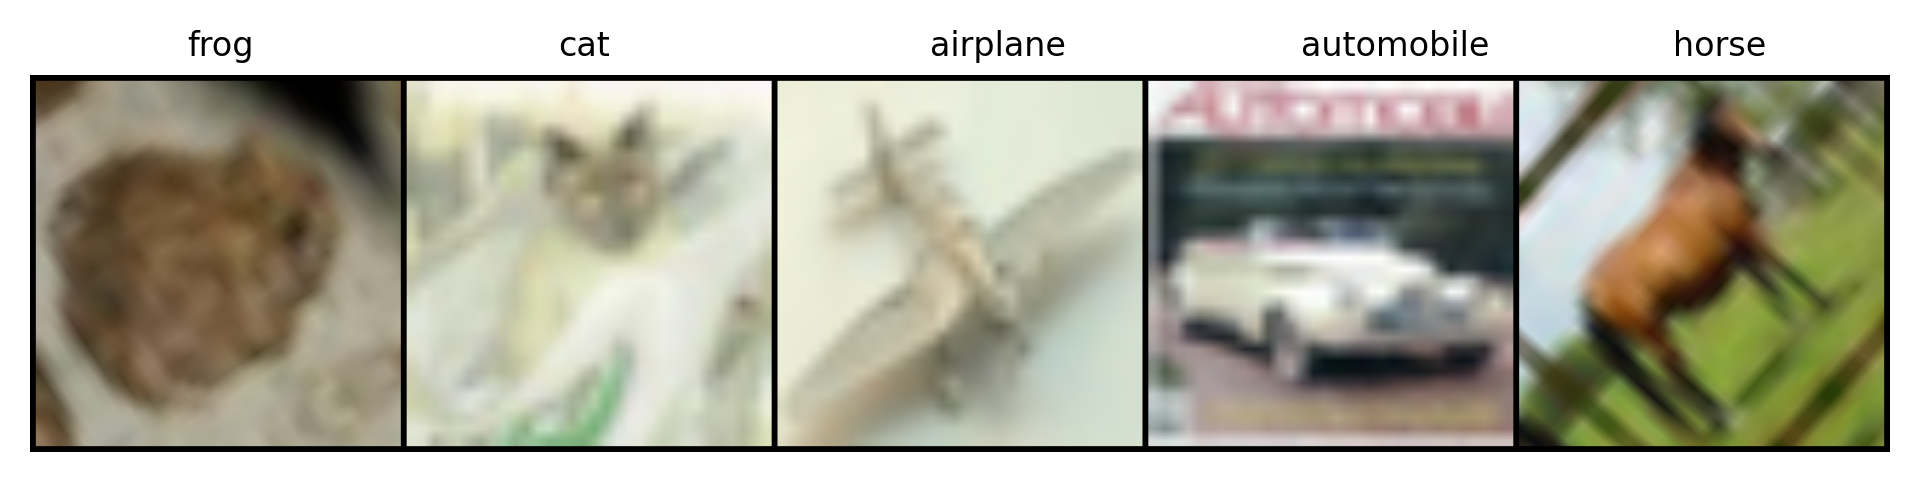

**Image Segmentation**

Dataset &#128073; [CAMVID](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamSeq01/)

Transforms &#128073; Resize &#10145;&#65039; Rotate &#10145;&#65039; Horizontal Flip

In [ ]:
def plot_grids(grids, titles = ["Input", 'Target']):
  nrow = len(grids)
  fig = plt.figure(figsize=(8, nrow), dpi=300)
  # Remove the space between the grids
  fig.subplots_adjust(wspace=0, hspace=0)
  # Each grid is new subplot
  for i in range(1,nrow+1):
      sub = fig.add_subplot(nrow,1,i)
      # Dont show the x-axis
      sub.xaxis.set_visible(False)
      # Remove y axis ticks and set yaxis label
      sub.set_yticks([])
      sub.set_ylabel(titles[i-1], rotation=0, fontsize=15, labelpad=30)
      sub.imshow(grids[i-1])
  plt.show()

# Create a list of Image grids from Torch tensors
def create_grids(imgList, nrofItems, pad, norm = True):
  # Permute the axis as numpy expects image of shape (H x W x C) 
  return list(map(lambda imgs: make_grid(imgs[:nrofItems], normalize=norm, padding = pad, nrow=nrofItems).permute(1, 2, 0), imgList))

# Create list of two image grids - Input Images & Target Mask Images for Segmentation task
def create_segement_grids(loader_iter, nrofItems = 5, pad = 4):
    inp, target = next(loader_iter)
    return create_grids([inp, target], nrofItems, pad)

# Call the plotting functions
grids = create_segement_grids(camvid_loader_iter)
plot_grids(grids)

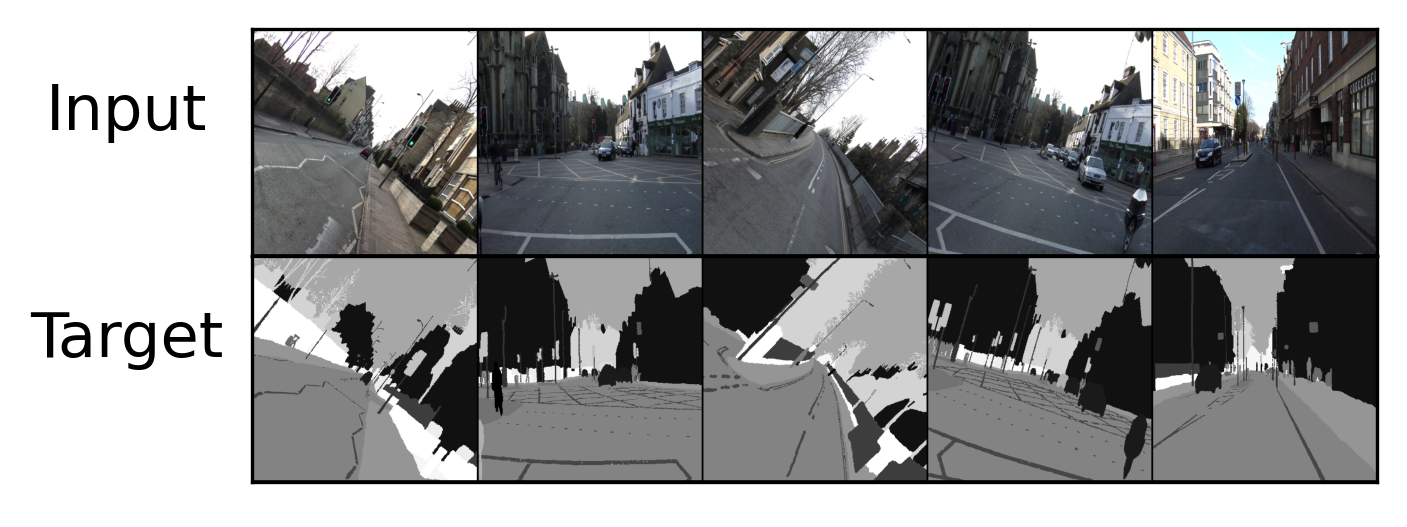

**Object Detection**

Dataset &#128073; [Penn-Fudan Database for Pedestrian Detection](https://www.cis.upenn.edu/~jshi/ped_html/)

Transforms &#128073; Resize &#10145;&#65039; Horizontal Flip &#10145;&#65039; Brightness & Contrast &#10145;&#65039; Shift, Scale & Rotate

In [ ]:
# Create Image grids for object detection
def create_object_grids(loader_iter, nrofItems = 5, pad = 4):
    inps, boxs, labels = next(loader_iter)
    
    # Filter only required items to display
    # Convert the Images to uint8 type
    inps, boxs, labels = torch.stack(inps[:nrofItems]).mul(255).type(torch.uint8), boxs[:nrofItems], labels[:nrofItems]
    
    # Target Image Tensors = Input Image Tensors + Bounding Boxes + Labels
    targets = torch.stack([draw_bounding_boxes(inp, box, lbl) for inp, box, lbl in zip(inps, boxs, labels)])
    
    #  Call Create Grids Function
    return create_grids([inps, targets], nrofItems, pad, False)

# Call for plotting function
grids = create_object_grids(pennfudan_iter)
plot_grids(grids)

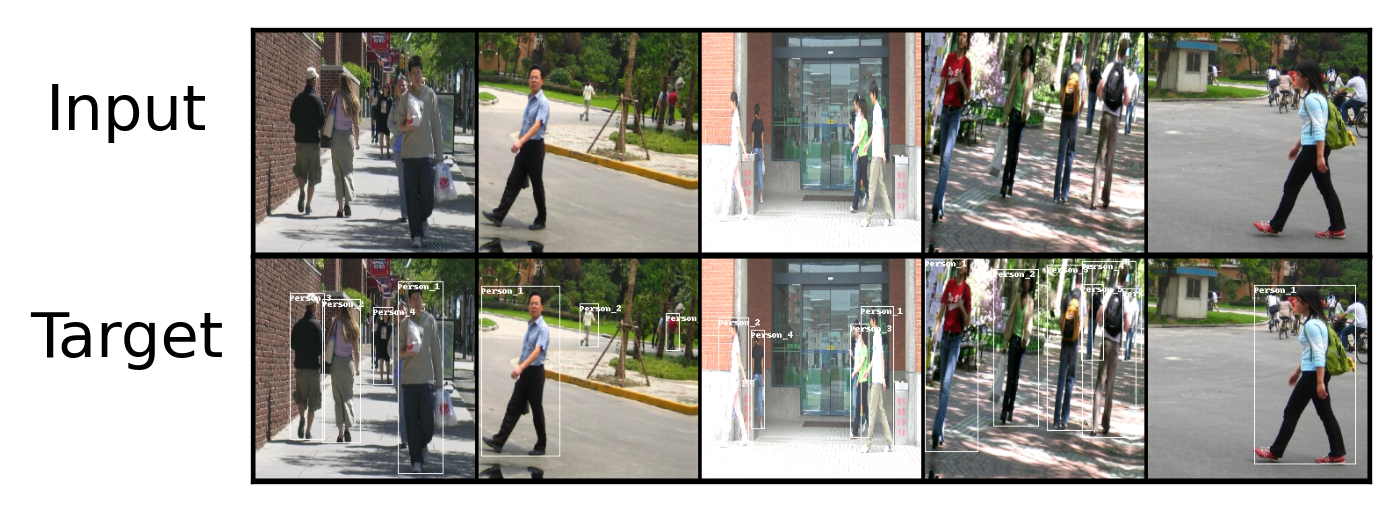

# Conclusion

In Computer Vision, it is relatively easier to grasp what the model is doing. How it does something is a different story, but with enough experiments we can sort of guess what is working and what is not. The key is to figure this out with minimal number of experiments. The more confident we are in the data pipeline setup, more time to run various experiments to improve the model performance.

# Side Notes:

[1]: I believe that the quote from *The Newsroom* is adopted from the below qoute by [Zig Ziglar](https://en.wikipedia.org/wiki/Zig_Ziglar), but I am not too sure.

> You cannot solve a problem until you acknowledge that you have one and take responsibility for solving it.

[2]: I am aware of AutoAlbument but I am yet to give it a go.